# ----------------------------------MISSING DATA----------------------------------------

### Imports

In [4]:
import pandas as pd
import numpy as np
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,neighbors

### Reading each CSV in a separate dataframe

In [5]:
d1 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3a_securev1.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3b_securev1.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3c_securev1.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats3d_securev1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q1.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q2.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q3.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2016Q4.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q1.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q2.csv', header=1, skipfooter=4, engine='python')
d11 = pd.read_csv('/Users/sonalichaudhari/Desktop/Data/LoanStats_securev1_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [6]:
loan_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])

In [7]:
loan_data.shape

(1524072, 151)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [8]:
missing_data = loan_data.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/loan_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
print('Number of columns after removing missing columns -',len(features))

Number of columns after removing missing columns - 93


### Excluding columns leaking information to the future

## ------------------------------Cleaning the data as per requirement----------------------------------

In [9]:
del loan_data['id']
s = loan_data.reset_index()
s['index'] = s.index +1
s=s.rename(columns = {'index':'Id'})

### Considering on the imp features

In [10]:
f = ['Id','application_type','fico_range_low','fico_range_high','emp_length','dti','annual_inc','dti_joint','annual_inc_joint','grade','sub_grade','int_rate','loan_amnt','issue_d','purpose','addr_state','zip_code']

In [11]:
# df is the main dataframe required for working
df = s[f]

In [12]:
df.head()

,Id,application_type,fico_range_low,fico_range_high,emp_length,dti,annual_inc,dti_joint,annual_inc_joint,grade,sub_grade,int_rate,loan_amnt,issue_d,purpose,addr_state,zip_code
0,1,Individual,735.0,739.0,10+ years,27.65,24000.0,NaN,NaN,B,B2,10.65%,5000.0,Dec-2011,credit_card,AZ,860xx
1,2,Individual,740.0,744.0,< 1 year,1.00,30000.0,NaN,NaN,C,C4,15.27%,2500.0,Dec-2011,car,GA,309xx
2,3,Individual,735.0,739.0,10+ years,8.72,12252.0,NaN,NaN,C,C5,15.96%,2400.0,Dec-2011,small_business,IL,606xx
3,4,Individual,690.0,694.0,10+ years,20.00,49200.0,NaN,NaN,C,C1,13.49%,10000.0,Dec-2011,other,CA,917xx
4,5,Individual,695.0,699.0,1 year,17.94,80000.0,NaN,NaN,B,B5,12.69%,3000.0,Dec-2011,other,OR,972xx


In [13]:
df.isnull().sum()

Id                        0
application_type          1
fico_range_low            1
fico_range_high           1
emp_length                1
dti                     174
annual_inc                5
dti_joint           1503556
annual_inc_joint    1503552
grade                     1
sub_grade                 1
int_rate                  1
loan_amnt                 1
issue_d                   1
purpose                   1
addr_state                1
zip_code                  2
dtype: int64

In [14]:
df = df[df.application_type.notnull()]

### Emp Length

In [15]:
df['emp_length']=np.where(df['emp_length']=='10+ years','10',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='< 1 year','0',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='1 year','1',df['emp_length'])
df['emp_length'] = df['emp_length'].map(lambda x: x.rstrip('years').strip())

### Zipcode

In [16]:
df['zip_code'] = df['zip_code'].astype(str).map(lambda x: x.rstrip('xx'))

### Int Rate

In [17]:
df['int_rate'] = df['int_rate'].astype(str).map(lambda x: x.rstrip('%'))
df['int_rate'] = df['int_rate'].astype(float)

### Date

In [18]:
df['Year'] = df['issue_d'].astype(str).map(lambda x: int(x.split('-')[1]))
df['Month'] = df['issue_d'].astype(str).map(lambda x: x.split('-')[0])

###  annual_inc_joint and dti_joint

In [19]:
df['dti_joint'] = np.where(df['application_type']=='Individual',0,df['dti_joint'])

In [20]:
df['annual_inc_joint'] = np.where(df['application_type']=='Individual',0,df['annual_inc_joint'])

In [21]:
df[df.annual_inc.isnull()]

,Id,application_type,fico_range_low,fico_range_high,emp_length,dti,annual_inc,dti_joint,annual_inc_joint,grade,sub_grade,int_rate,loan_amnt,issue_d,purpose,addr_state,zip_code,Year,Month
42450,42451,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A2,7.43,5000.0,Aug-2007,other,NY,100,2007,Aug
42451,42452,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A3,7.75,7000.0,Aug-2007,other,NY,100,2007,Aug
42481,42482,Individual,800.0,804.0,0,1.0,NaN,0.0,0.0,A,A3,7.75,6700.0,Jul-2007,other,NY,100,2007,Jul
42534,42535,Individual,740.0,744.0,0,4.0,NaN,0.0,0.0,A,A5,8.38,6500.0,Jun-2007,other,NY,100,2007,Jun


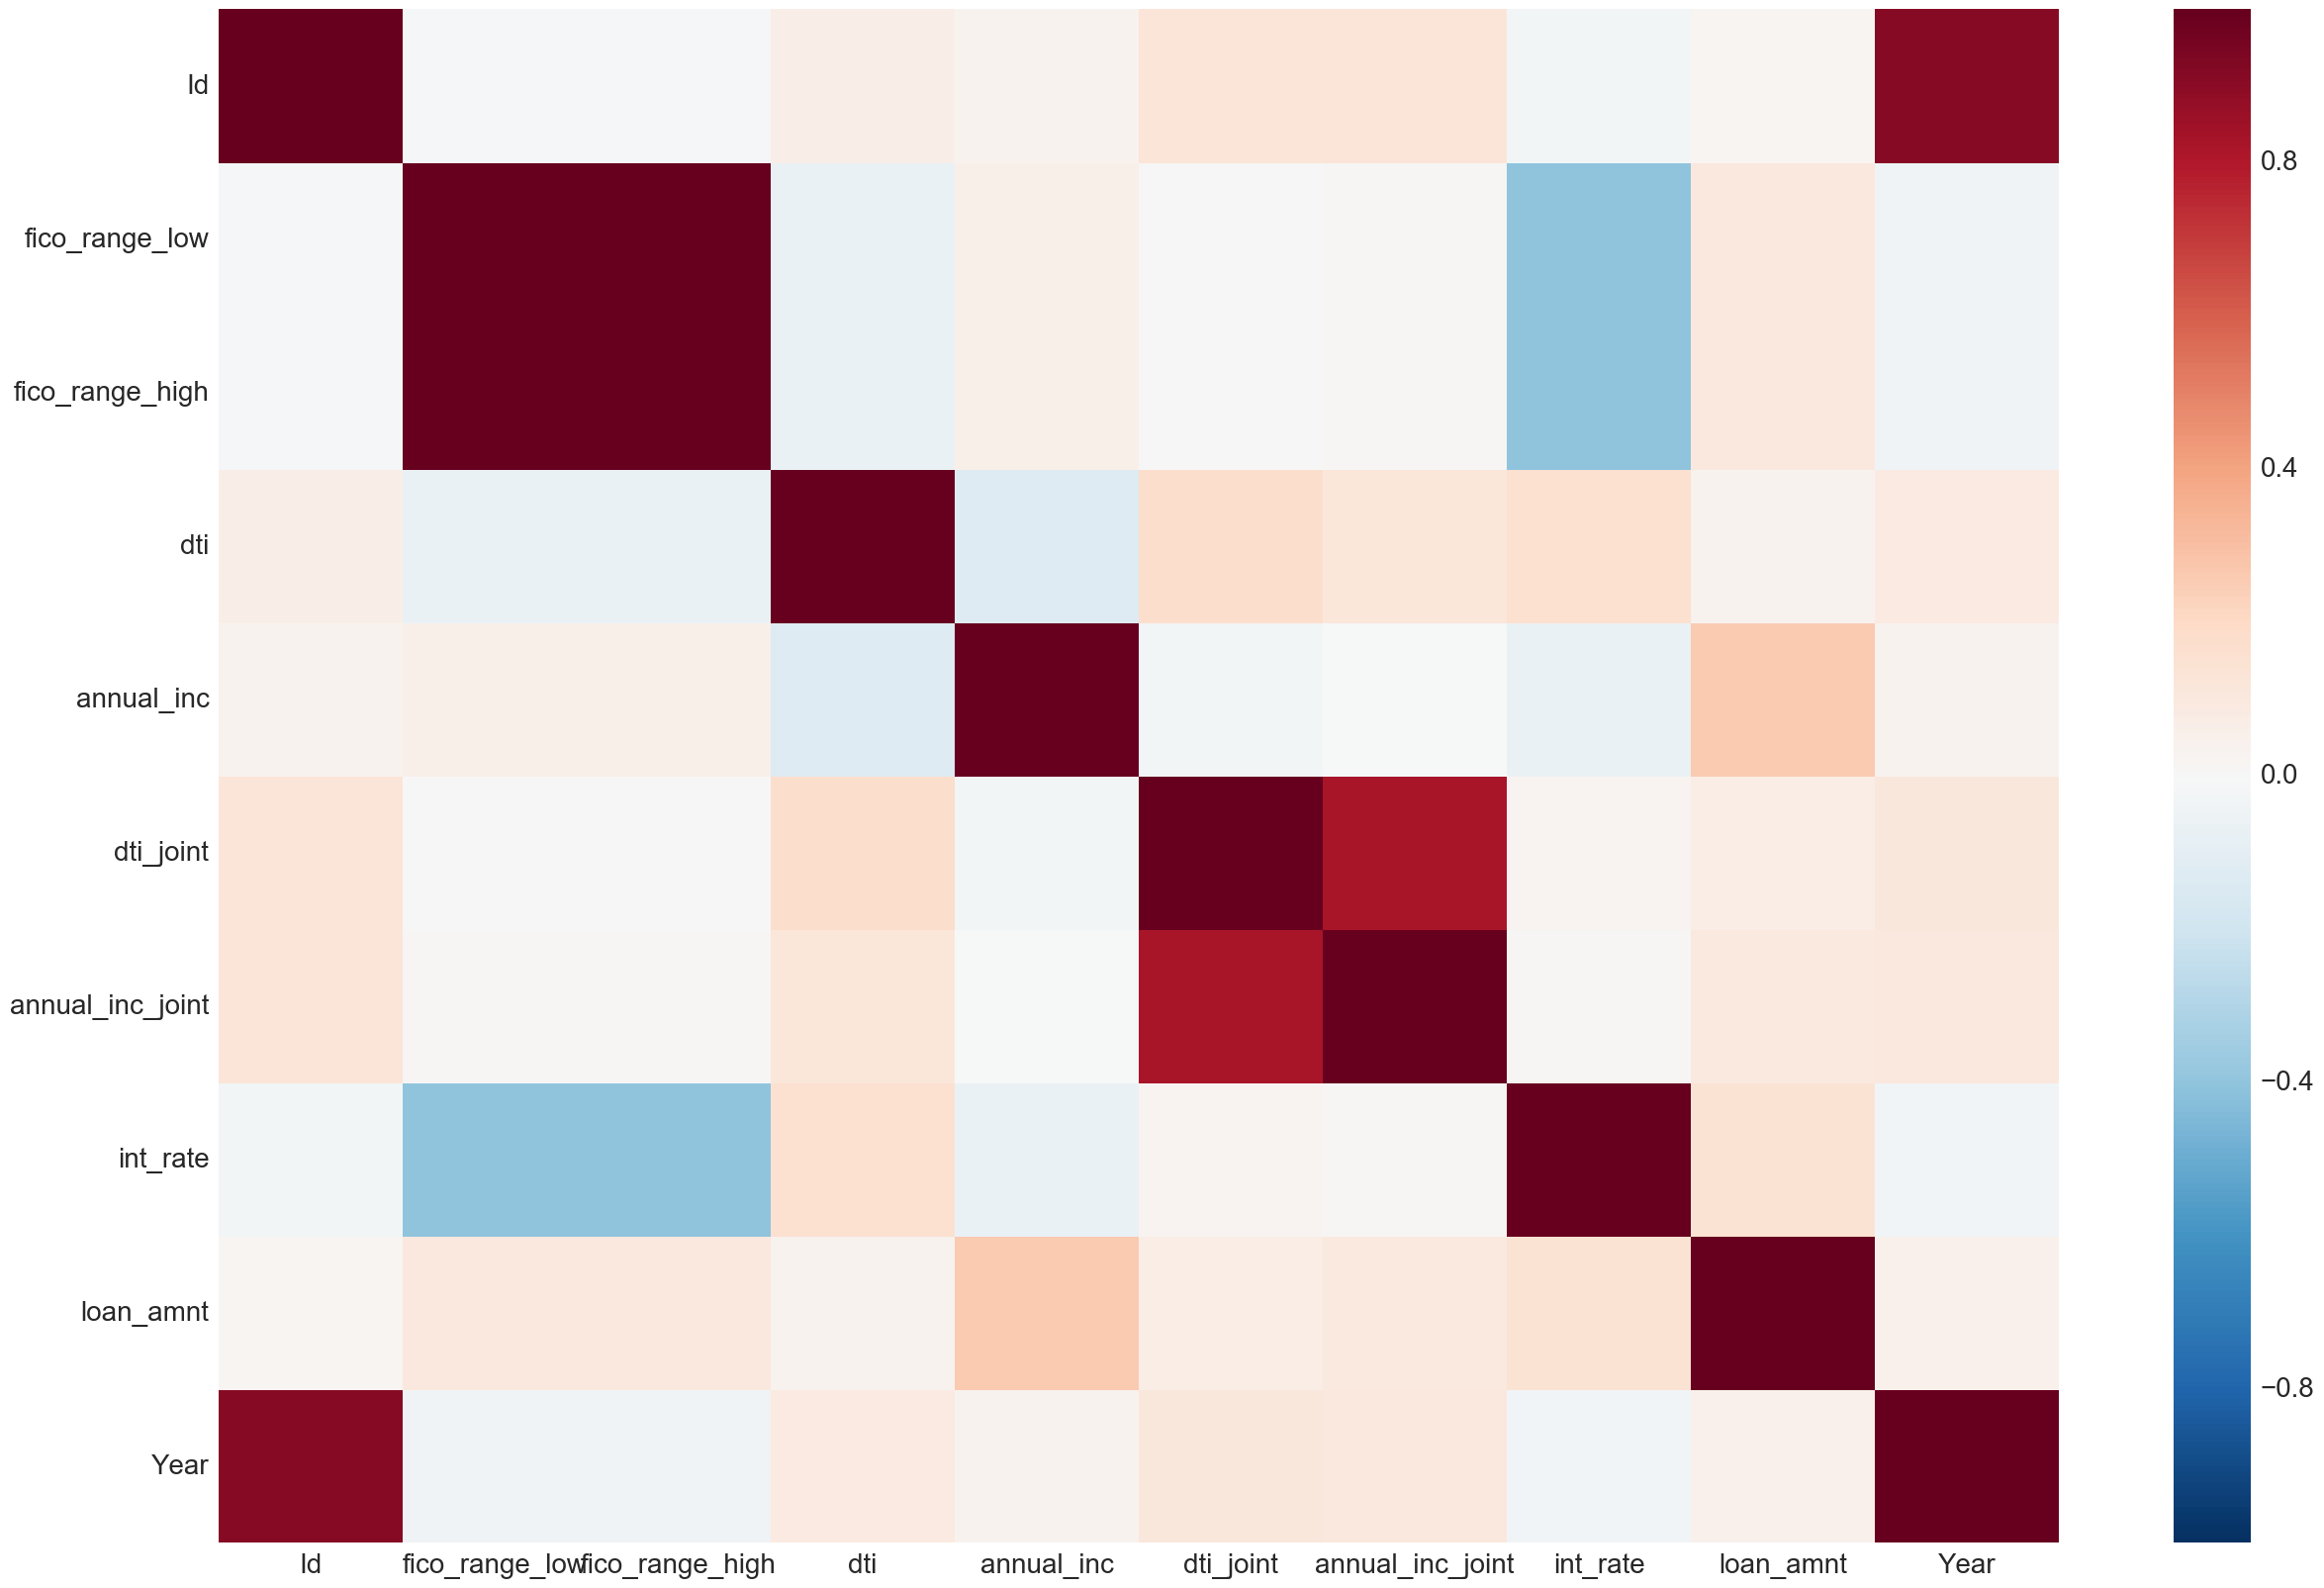

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

### annual_inc

In [23]:
part = df[['Id','sub_grade', 'annual_inc']]
Mode = df['annual_inc'].mode()[0]
a = list(df['sub_grade'].unique())

for c in a:
    t = part[part.sub_grade == c]
    if( t.annual_inc.isnull().sum()==0):
            break
    else:
            if(t.shape == t[t.isnull().any(axis=1)].shape ):
                t['annual_inc'].fillna(Mode, inplace=True)
            else:
                c = t['annual_inc'].mode()[0]
                t['annual_inc'].fillna(c, inplace=True)
            part.loc[part.Id.isin(t.id), ['annual_inc']] = t[['annual_inc']]
part['annual_inc'].fillna(part['annual_inc'].mode()[0], inplace = True)      
df.loc[df.Id.isin(part.Id), ['annual_inc']] = part[['annual_inc']]

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


##### Knn for dti filling

In [ ]:
base = 'Id','dti','int_rate','dti_joint','annual_inc_joint'
target_column = 'dti'

null = df[target_column].isnull()
not_null = ~null
num_miss = null.sum()
num_miss

X_train = df.loc[not_null, base].sample(frac = 1)
X=X_train[['Id','int_rate','dti_joint','annual_inc_joint']].values

y = X_train[target_column].astype(int)
y = y.values

Y_target =df.loc[null, base].sample(frac = 1)
Y =Y_target[['Id','int_rate','dti_joint','annual_inc_joint']].values

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
accuracy = clf.score(X, y) 
print(accuracy)
prediction = clf.predict(Y)

In [ ]:
Y_target.loc[Y_target.dti.isnull(),'dti'] = prediction
df.loc[df.Id.isin(Y_target.Id), ['dti']] = Y_target[['dti']]

##### dti_joint filling

In [24]:
part = df[['dti_joint', 'sub_grade','Id']][df.application_type=='Joint App']
Mode = df['dti_joint'].mode()[0]
a = list(df['sub_grade'].unique())

for c in a:
    t = part[part.sub_grade == c]
    if( t.dti_joint.isnull().sum()==0):
            break
    else:
            if(t.shape == t[t.isnull().any(axis=1)].shape ):
                t['dti_joint'].fillna(Mode, inplace=True)
            else:
                c = t['dti_joint'].mode()[0]
                t['dti_joint'].fillna(c, inplace=True)
            part.loc[part.Id.isin(t.id), ['dti_joint']] = t[['dti_joint']]
part['dti_joint'].fillna(part['dti_joint'].mode()[0], inplace = True)      
df.loc[df.Id.isin(part.Id), ['dti_joint']] = part[['dti_joint']]

### Fico columns

In [25]:
 df['fico_avg'] = (df['fico_range_high']+df['fico_range_low'])/2

In [26]:
df.isnull().sum()

Id                    0
application_type      0
fico_range_low        0
fico_range_high       0
emp_length            0
dti                 173
annual_inc            0
dti_joint             0
annual_inc_joint      0
grade                 0
sub_grade             0
int_rate              0
loan_amnt             0
issue_d               0
purpose               0
addr_state            0
zip_code              0
Year                  0
Month                 0
fico_avg              0
dtype: int64

In [47]:
df = df[df.dti.notnull()]

In [48]:
df.shape

(1523898, 20)

In [49]:
df.to_csv('/Users/sonalichaudhari/Desktop/Decline/Loan.csv')

In [51]:
def concatDeclineloandatacsv():
    #direct = os.path.dirname(os.getcwd()) 
    newpathdeclineloanFinal = '/Users/sonalichaudhari/Desktop/Decline'
    d1 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsA.csv', header=1, skipfooter=4, engine='python')
    d2 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsB.csv', header=1, skipfooter=4, engine='python')
    d3 = pd.read_csv(newpathdeclineloanFinal+'/RejectStatsD.csv', header=1, skipfooter=4, engine='python')
    d4 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q1.csv', header=1, skipfooter=4, engine='python')
    d5 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q2.csv', header=1, skipfooter=4, engine='python')
    d6 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q3.csv', header=1, skipfooter=4, engine='python')
    d7 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2016Q4.csv', header=1, skipfooter=4, engine='python')
    d8 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q1.csv', header=1, skipfooter=4, engine='python')
    d9 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q2.csv', header=1, skipfooter=4, engine='python')
    d10 = pd.read_csv(newpathdeclineloanFinal+'/RejectStats_2017Q3.csv', header=1, skipfooter=4, engine='python')
    concatdata = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10])
    return concatdata

In [52]:
concatDataReject = concatDeclineloandatacsv()

In [53]:
concatDataReject['Id'] = concatDataReject.index + 1

In [54]:
concatDataReject['Debt-To-Income Ratio'] = concatDataReject['Debt-To-Income Ratio'].str.slice(0,-1).astype('float')

In [55]:
#concatDataReject['Application Date'] = concatDataReject['Application Date'].map(lambda a: datetime.datetime.strptime(a, ('%Y-%m-%d')))
concatDataReject['Year'] = concatDataReject['Application Date'].astype(str).map(lambda x: int(x.split('-')[0]))
concatDataReject['Month'] = concatDataReject['Application Date'].astype(str).map(lambda x: x.split('-')[1])
concatDataReject['Day'] = concatDataReject['Application Date'].astype(str).map(lambda x: x.split('-')[2])
concatDataReject['Month']=concatDataReject['Month'].astype(int)
concatDataReject['Day']=concatDataReject['Day'].astype(int)

In [56]:
concatDataReject['Loan Title'].fillna('title_none', inplace=True)

In [57]:
zipState = concatDataReject[["Zip Code","State"]]

In [58]:
null_data = zipState[zipState.isnull().any(axis=1)]

In [59]:
def missingzipcode():
    locate = concatDataReject[['Zip Code','Id', 'State']]
    Mode = concatDataReject['Zip Code'].mode()[0]
    county= list(locate['State'].unique())

    for c in county:
        temp = locate[locate['Zip Code'] == c]
        if( temp['Zip Code'].isnull().sum()==0):
            break
        else:
            if(temp.shape == temp[temp.isnull().any(axis=1)].shape ):
                temp['Zip Code'].fillna(Mode, inplace=True)
            else:
                c = temp['Zip Code'].mode()[0]
                temp['Zip Code'].fillna(c, inplace=True)
            locate.loc[locate.Id.isin(temp.Id), ['Zip Code']] = temp[['Zip Code']]
    locate['Zip Code'].fillna(locate['Zip Code'].mode()[0], inplace = True)      
    concatDataReject.loc[concatDataReject.Id.isin(locate.Id), ['Zip Code']] = locate[['Zip Code']]

In [60]:
missingzipcode()

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
concatDataReject['Zip Code'] = concatDataReject['Zip Code'].astype(str).map(lambda x: x.rstrip('xx'))

In [62]:
concatDataReject['Employment Length']=np.where(concatDataReject['Employment Length']=='10+ years','10',concatDataReject['Employment Length'])
concatDataReject['Employment Length']=np.where(concatDataReject['Employment Length']=='< 1 year','0',concatDataReject['Employment Length'])
concatDataReject['Employment Length']=np.where(concatDataReject['Employment Length']=='1 year','1',concatDataReject['Employment Length'])
concatDataReject['Employment Length'] = concatDataReject['Employment Length'].map(lambda x: x.rstrip('years'))
concatDataReject['Employment Length'] = concatDataReject['Employment Length'].map(lambda x: x.strip())
concatDataReject = concatDataReject[concatDataReject['Employment Length'] != 'n/']
concatDataReject['Employment Length']= concatDataReject['Employment Length'].astype(int)
#concatDataReject['Employment Length'].unique()
#concatDataReject['Employment Length']

In [63]:
Mode = concatDataReject['Policy Code'].mode()[0]
concatDataReject['Policy Code'].fillna(Mode, inplace=True)

In [67]:
concatDataReject=concatDataReject.rename(columns = {'Amount Requested':'loan_amnt'})
concatDataReject=concatDataReject.rename(columns = {'Application Date':'application_date'})
concatDataReject=concatDataReject.rename(columns = {'Loan Title':'loan_title'})
concatDataReject=concatDataReject.rename(columns = {'Zip Code':'zip_code'}) 
concatDataReject=concatDataReject.rename(columns = {'Debt-To-Income Ratio':'dti'})
concatDataReject=concatDataReject.rename(columns = {'Employment Length':'emp_length'})
concatDataReject=concatDataReject.rename(columns = {'Risk_Score':'risk-score'})
concatDataReject=concatDataReject.rename(columns = {'Application Date':'application_date'})

In [70]:
#concatDataReject['Risk_Score'].fillna(concatDataReject['Risk_Score'].mean(), inplace=True)

In [73]:
#loan_data.title

In [74]:
concatDataReject.columns.tolist()

['loan_amnt',
 'application_date',
 'loan_title',
 'risk-score',
 'dti',
 'zip_code',
 'State',
 'emp_length',
 'Policy Code',
 'Id',
 'Year',
 'Month',
 'Day']

In [118]:
df = df[['Id','loan_amnt','risk-score','Month','Year','emp_length','dti','dti_joint']]

In [120]:
lookup = {'Dec':12, 'Nov':11, 'Oct':10, 'Sep':9, 'Aug':8, 'Jul':7, 'Jun':6, 'May':5, 'Apr':4,'Mar':3, 'Feb':2, 'Jan':1}

In [122]:
df['Month'] =  df['Month'].apply(lambda x: lookup[x])

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
df.Month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [124]:
df=df.rename(columns = {'fico_avg':'risk-score'})

In [125]:
df.columns.tolist()

['Id',
 'loan_amnt',
 'risk-score',
 'Month',
 'Year',
 'emp_length',
 'dti',
 'dti_joint']

In [80]:
decline = concatDataReject[['Id','loan_amnt','risk-score','Month','Year','emp_length','dti',]]

In [87]:
decline.columns.tolist()

['Id',
 'loan_amnt',
 'risk-score',
 'Month',
 'Year',
 'emp_length',
 'dti',
 'approval']

In [84]:
decline.columns.tolist()

['Id', 'loan_amnt', 'risk-score', 'Month', 'Year', 'emp_length', 'dti']

In [126]:
df['approval'] ='y'
decline['approval']='n'

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [127]:
main = pd.concat([decline, df])

In [128]:
main.shape

(17028377, 9)

In [129]:
decline.shape

(15504479, 8)

In [130]:
main['dti_joint'].isnull().sum()

15504479

In [131]:
main['dti']=main['dti'].astype(float)

In [132]:
main.dti_joint.describe()

count    1.523898e+06
mean     2.454835e-01
std      2.257649e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.949000e+01
Name: dti_joint, dtype: float64

In [133]:
#main.dti_joint.sort_values(ascending=False)

In [134]:
main['dti_joint'].fillna(0,inplace = True)

In [135]:
main.isnull().sum()

Id            0
Month         0
Year          0
approval      0
dti           0
dti_joint     0
emp_length    0
loan_amnt     0
risk-score    0
dtype: int64

In [136]:
main.head()

,Id,Month,Year,approval,dti,dti_joint,emp_length,loan_amnt,risk-score
0,1,5,2007,n,10.00,0.0,4,1000.0,693.0
1,2,5,2007,n,10.00,0.0,0,1000.0,703.0
2,3,5,2007,n,10.00,0.0,1,11000.0,715.0
3,4,5,2007,n,38.64,0.0,0,6000.0,698.0
4,5,5,2007,n,9.43,0.0,0,1500.0,509.0


In [143]:
main.loc[main.emp_length=='n/', ['emp_length']] = 0

In [154]:
main.columns

Index(['Id', 'Month', 'Year', 'approval', 'dti', 'dti_joint', 'emp_length',
       'loan_amnt', 'risk-score'],
      dtype='object')

In [152]:
main['approval'] = main['approval'].astype(int)

In [146]:
# y==1
# n ==0

In [147]:
main.loc[main.approval=='y', ['approval']] = 1

In [149]:
main.loc[main.approval=='n', ['approval']] = 0

In [155]:
yy = main['approval']
cols_to_keep = ['Month', 'Year','dti', 'dti_joint', 'emp_length','loan_amnt', 'risk-score']
XX = main[cols_to_keep]

In [157]:
yy = np.ravel(yy)

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=0)

In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [163]:
y_pred = model.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3795513   80530]
 [ 193358  187694]]


In [165]:
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


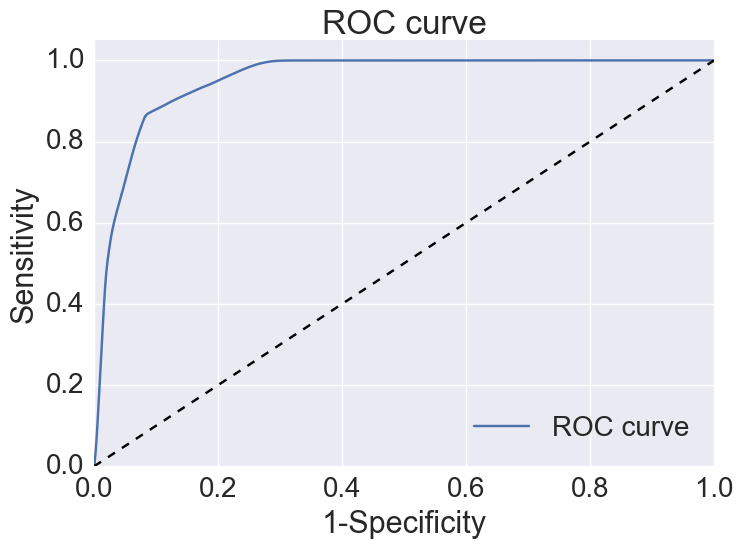

In [166]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Random

In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
%pylab inline
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
from sklearn.model_selection import GridSearchCV
import pickle

Populating the interactive namespace from numpy and matplotlib


/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
rf = RandomForestRegressor(n_estimators=300, min_samples_leaf=3)
rf.fit(X_train, y_train)